In [1]:
%pylab inline

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import os
import pandas as pd
import scipy
#from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
OUTDIR = "pdfs/"

Populating the interactive namespace from numpy and matplotlib


This notebook contains code to generate the following results from Zheng et al 2020:

* ED Figure 1 A-B: GC Content
* ED Figure 1 C-D: Comparison of performance between baseline/GC-controlled/DNaseI-controlled models
* ED FIgure 1 G-H: TF/TF pairwise comparison

# Extended Data Figure 1a-b

(0.6557380635828086, 7.867330293495226e-06)
(0.5840560002503505, 0.00011828257805705073)


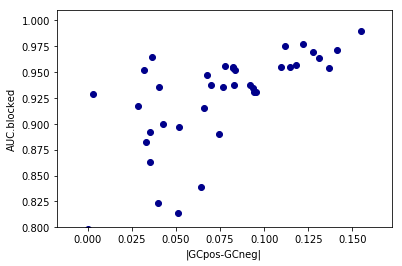

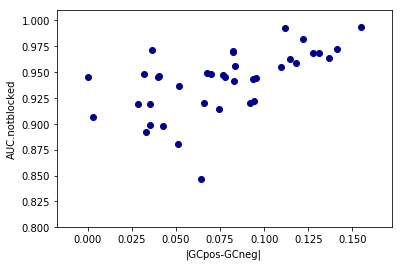

In [2]:
data = pd.read_csv("AgentBindGCPerformance.txt", sep="\t")
factors = list(data["TF"].values)
x = list((data["GC.pos"]-data["GC.neg"]).apply(abs))
y1 = list(data["AUC.blocked"])
y2 = list(data["AUC.notblocked"])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y1, color="darkblue");
ax.set_xlabel("|GCpos-GCneg|")
ax.set_ylabel("AUC.blocked")
ax.set_ylim(bottom=0.80, top=1.01)
fig.savefig(os.path.join(OUTDIR, "AgentBind_SuppFig_GC_Blocked.pdf"))
print(scipy.stats.pearsonr(x, y1))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x, y2, color="darkblue");
ax.set_xlabel("|GCpos-GCneg|")
ax.set_ylabel("AUC.notblocked")
ax.set_ylim(bottom=0.80, top=1.01)
fig.savefig(os.path.join(OUTDIR, "AgentBind_SuppFig_GC_NotBlocked.pdf"))
print(scipy.stats.pearsonr(x, y2))

# Extended Data Fig. c-d DNaseI/GC model comparison

(-0.39873428250945986, 0.013150852114496401)
0.13299352631578945
(0.490054629524985, 0.0017895382071237466)
0.013149289473684232


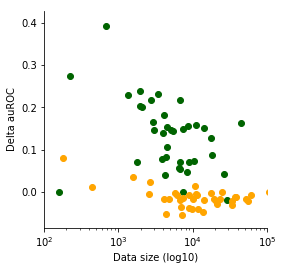

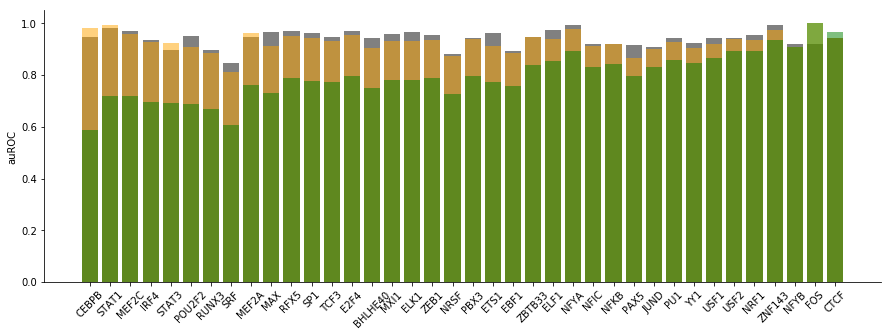

In [3]:
data = pd.read_csv("agentbind-modelcontrols.csv")

data["diff-GC"] = data.apply(lambda x: x["auROC-GC"]-x["auROC-all"], 1)
data["diff-Dnase"] = data.apply(lambda x: x["auROC-GC-Dnase"]-x["auROC-GC"], 1)
data["sizediff-GC"] = data.apply(lambda x: (x["total-GC"])*1.0/x["total-all"], 1)
data["sizediff-Dnase"] = data.apply(lambda x: (x["total-GC-Dnase"])*1.0/x["total-GC"], 1)

data = data.sort_values("diff-Dnase", ascending=True)

import scipy.stats
fig = plt.figure()
fig.set_size_inches((4, 4))
ax = fig.add_subplot(111)
ax.scatter((data["total-GC-Dnase"]), data["auROC-GC"]-data["auROC-GC-Dnase"], color="darkgreen");
print(scipy.stats.pearsonr(np.log10(data["total-GC-Dnase"]), data["auROC-GC"]-data["auROC-GC-Dnase"]))
print(np.mean(data["auROC-GC"]-data["auROC-GC-Dnase"]))

ax.scatter((data["total-GC"]), data["auROC-GC"]-data["auROC-all"], color="orange");
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(left=100, right=10**5)
plt.xscale("log")
ax.set_xlabel("Data size (log10)")
ax.set_ylabel("Delta auROC")
print(scipy.stats.pearsonr(np.log10(data["total-GC"]), data["auROC-all"]-data["auROC-GC"]))
print(np.mean(data["auROC-all"]-data["auROC-GC"]))
fig.savefig(os.path.join(OUTDIR, "AgentBind_ED1_ModelCompare-samplesize3-GC.pdf"))

# Plot ROCall, ROCgc, ROCDnase
fig = plt.figure()
fig.set_size_inches((15, 5))
ax = fig.add_subplot(111)
ax.bar(range(data.shape[0]), data["auROC-all"], color="gray")
ax.bar(range(data.shape[0]), data["auROC-GC"], color="orange", alpha=0.5)
ax.bar(range(data.shape[0]), data["auROC-GC-Dnase"], color="green", alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks(range(data.shape[0]))
ax.set_xticklabels(data["TF"], rotation=45)
ax.set_ylabel("auROC")

fig.savefig(os.path.join(OUTDIR, "AgentBind_ED1_ModelCompare.pdf"))

# Extended Data Fig. e-h pairwise TF comparisons

In [4]:
auc_matrix = []
auc_matrix_dnase = []

result_dir = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans-GC-balanced//storage/AgentBind-GM12878-DanQ/results-cross-TFs/"
result_dir_dnase = "/storage/pandaman/project/AgentBind-GM12878-DanQ-unfixed-rnn-trans-DNased-filter/storage/AgentBind-GM12878-DanQ/results-cross-TFs/"

# Reorder based on DNase diff
data = pd.read_csv("agentbind-modelcontrols.csv")
data["diff-Dnase"] = data.apply(lambda x: x["auROC-GC-Dnase"]-x["auROC-GC"], 1)
data = data.sort_values("diff-Dnase", ascending=True)
#data = data.sort_values("auROC-GC")
#TF_list = [item for item in list(data["TF"]) if "%s+GM12878"%item in os.listdir(result_dir)]
TF_list = ['BHLHE40','CEBPB','CTCF','E2F4','EBF1','ELF1','ELK1','ETS1','FOS','IRF4','JunD','Max','MEF2A','MEF2C','Mxi1','NFIC','NFKB','NFYA','NFYB','Nrf1','NRSF','PAX5','PBX3','POU2F2','PU1','RFX5','RUNX3','SP1','SRF','STAT1','STAT3','TCF3','USF1','USF2','YY1','ZBTB33','ZEB1','Znf143']


for source_TF in TF_list:
    auc_list = []
    auc_list_dnase = []
    for target_TF in TF_list:
        elems = open("%s/%s+GM12878/%s+GM12878/auc_summary.txt"%(result_dir, source_TF, target_TF)).readline().split()
        auc_val = float(elems[1])
        auc_list.append(auc_val)
        # Update DNAse
        elems = open("%s/%s+GM12878/%s+GM12878/auc_summary.txt"% (result_dir_dnase, source_TF, target_TF)).readline().split()
        auc_val = float(elems[1])
        auc_list_dnase.append(auc_val)
    auc_matrix.append(auc_list)
    auc_matrix_dnase.append(auc_list_dnase)

In [5]:
print ("These datasets can be predicted better with models of other TFs:")
ind = 0
labels = ["GC","GC+Dnase"]
for am in [auc_matrix, auc_matrix_dnase]:
    alldiffs = []
    diffs = []
    print(labels[ind])
    for target_TF_idx in range(len(TF_list)):
        auc_list = [am[source_TF_idx][target_TF_idx] for source_TF_idx in range(len(TF_list))]
        if max(auc_list) > am[target_TF_idx][target_TF_idx]:
            print("Dataset: %s, its own model: %f, better model: %s (%f)" %(\
                TF_list[target_TF_idx], am[target_TF_idx][target_TF_idx],\
                TF_list[auc_list.index(max(auc_list))], max(auc_list)))
            diffs.append(max(auc_list)-am[target_TF_idx][target_TF_idx])
    ind += 1
    print(np.mean(diffs))

These datasets can be predicted better with models of other TFs:
GC
Dataset: ETS1, its own model: 0.911168, better model: ELK1 (0.917126)
Dataset: JunD, its own model: 0.900965, better model: RUNX3 (0.915439)
Dataset: MEF2C, its own model: 0.956828, better model: MEF2A (0.962495)
Dataset: NFYA, its own model: 0.976942, better model: USF2 (0.979279)
Dataset: STAT3, its own model: 0.922203, better model: NFIC (0.931206)
0.0074878
GC+Dnase
Dataset: CEBPB, its own model: 0.587500, better model: EBF1 (0.810417)
Dataset: MEF2A, its own model: 0.760742, better model: RUNX3 (0.770996)
Dataset: MEF2C, its own model: 0.717305, better model: EBF1 (0.766946)
Dataset: POU2F2, its own model: 0.689883, better model: PBX3 (0.731965)
Dataset: RUNX3, its own model: 0.667078, better model: ETS1 (0.690135)
Dataset: SRF, its own model: 0.606306, better model: STAT3 (0.678604)
Dataset: STAT1, its own model: 0.718750, better model: MEF2C (0.843750)
Dataset: STAT3, its own model: 0.692763, better model: NFYB 

GC
0.017348999999999948
-0.005958000000000019
GC+Dnase
0.040641999999999956
-0.0557415


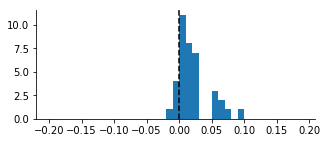

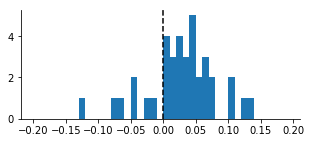

In [7]:
# Histogram of differences
labels = ["GC","GC+Dnase"]
ind = 0

for am in [auc_matrix, auc_matrix_dnase]:
    alldiffs = []
    negdiffs = []
    posdiffs = []
    print(labels[ind])
    for target_TF_idx in range(len(TF_list)):
        auc_list = [am[source_TF_idx][target_TF_idx] for source_TF_idx in range(len(TF_list))]
        best_model = max(auc_list)
        nextbest_model = max([item for item in auc_list if item != best_model])
        target_model = am[target_TF_idx][target_TF_idx]
        if target_model == best_model:
            alldiffs.append(best_model - nextbest_model)
            posdiffs.append(best_model - nextbest_model)
        else:
            alldiffs.append(target_model - best_model)
            negdiffs.append(target_model - best_model)
    fig = plt.figure()
    fig.set_size_inches((5, 2))
    ax = fig.add_subplot(111)
    ax.hist(alldiffs, bins=np.arange(-0.2, 0.2, 0.01))
    ax.axvline(x=0, linestyle="dashed", color="black")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    fig.savefig(os.path.join(OUTDIR, "AgentBind_ED1_aucdiff_%s.pdf"%[labels[ind]]))
    ind += 1
    print(np.median(posdiffs))
    print(np.median(negdiffs))

(38, 38)


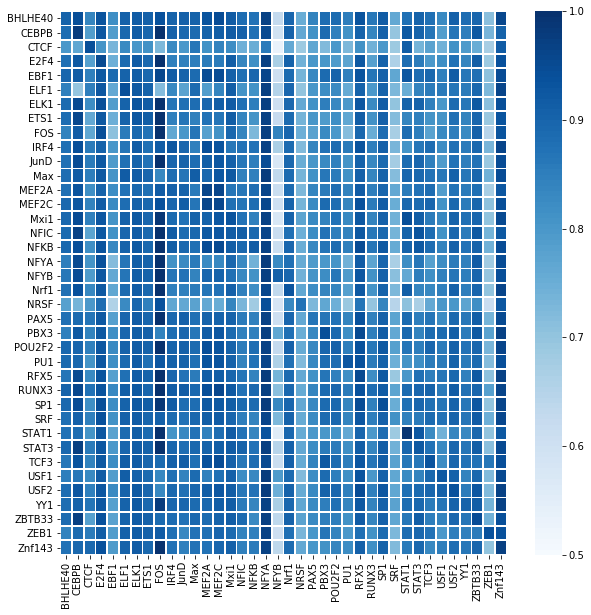

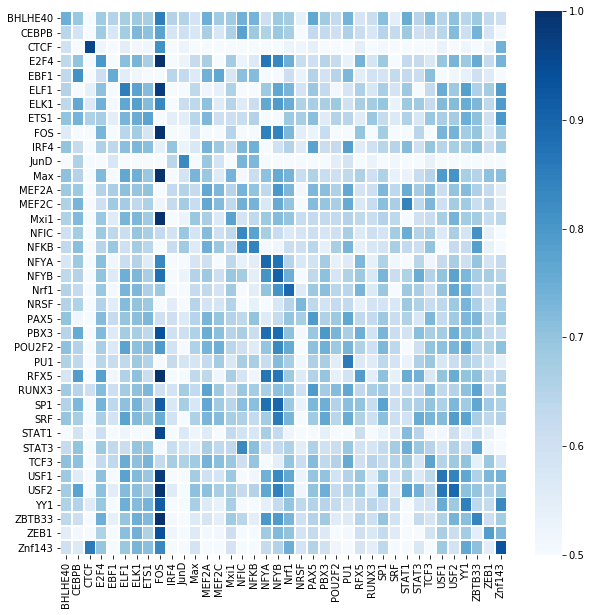

In [8]:
df = pd.DataFrame(data = numpy.array(auc_matrix), index = TF_list, columns = TF_list)
df_dnase = pd.DataFrame(data = numpy.array(auc_matrix_dnase), index=TF_list, columns=TF_list)
#df = df.reindex(TF_reorder, axis='columns')
#df = df.reindex(TF_reorder, axis='rows')

# rows are model, cols are TF being predicted
print(df.shape)
fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((10,10))
sns.heatmap(df, vmin=0.5, vmax=1, linewidths=.75, cmap=sns.color_palette("Blues", 100), ax=ax)
fig.savefig(os.path.join(OUTDIR, "AgentBind_ED1_Heatmap-GC.pdf"))

fig = plt.figure()
ax = fig.add_subplot(111)
fig.set_size_inches((10,10))
sns.heatmap(df_dnase, vmin=0.5, vmax=1, linewidths=.75, cmap=sns.color_palette("Blues", 100), ax=ax)
fig.savefig(os.path.join(OUTDIR, "AgentBind_ED1_Heatmap-DNase.pdf"))